# 2023-Fall CSE362 HW1
### Student ID: 20181016
### Name: Kwon Yongmin

In [65]:
# !pip install --upgrade matplotlib
# !pip3 install ipympl
%matplotlib inline
# %matplotlib widget
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

<ipython-input-65-62917458f75f>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-whitegrid')


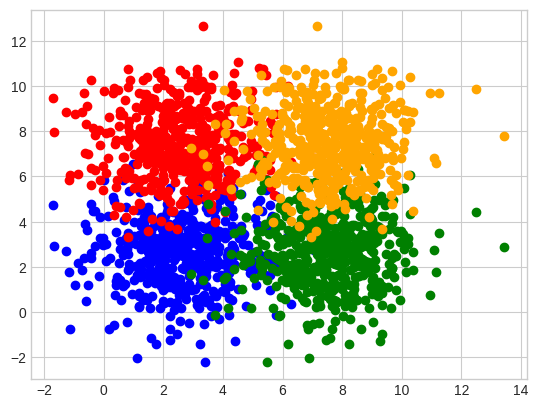

In [66]:
# Train dataset
data_size = 500

rng = np.random.RandomState(1)
mu, sigma = 2.5, 1.5
x0 = rng.normal(mu, sigma, data_size)
mu, sigma = 7.5, 1.5
x1 = rng.normal(mu, sigma, data_size)
mu, sigma = 2.5, 1.5
y0 = rng.normal(mu, sigma, data_size)
mu, sigma = 7.5, 1.5
y1 = rng.normal(mu, sigma, data_size)

mu, sigma = 5, .5
x_new = rng.normal(mu, sigma, data_size*3)
mu, sigma = 5, .5
y_new = rng.normal(mu, sigma, data_size*3)

x = []
y = []
label = []

x.extend(x0)
x.extend(x0)
x.extend(x1)
x.extend(x1)
y.extend(y0)
y.extend(y1)
y.extend(y0)
y.extend(y1)

label.extend([0] * data_size)
label.extend([1] * data_size)
label.extend([2] * data_size)
label.extend([3] * data_size)


plt.scatter(x0, y0, color='blue');
plt.scatter(x0, y1, color='red');
plt.scatter(x1, y0, color='green');
plt.scatter(x1, y1, color='orange');

data_points = []

for xd, yd, l in zip(x, y, label):
  data_points.append([xd, yd, l])

In [67]:
##### TODO #####
def softmax(z):
    exp_z=np.exp(z)
    a=exp_z/np.sum(exp_z)
    return a

wi = np.random.randn(2, 4) * 0.01
bi = np.random.randn(1, 4)
wo = np.random.randn(4, 4) * 0.01
bo = np.random.randn(1, 4)

lr = 0.15

for i in range(1000):

  dwi = 0
  dbi = 0
  dwo = 0
  dbo = 0
  cnt = 0
  loss_total = 0

  for x_0, x_1, label in data_points:

    #Forward Pass
    x = np.array([x_0, x_1])[np.newaxis]
    h = np.matmul(x, wi) + bi
    z = np.matmul(h, wo) + bo
    z = np.clip(z,-100,None)
    a = softmax(z)

    #Backward Pass
    coded_y = np.zeros(4)
    for j in range(4):
      if j == label:
        coded_y[j] = 1
      else:
        coded_y[j] = 0
    dldz = a - coded_y
    dwo += np.matmul(h.T, dldz)
    dbo += dldz
    dldh = np.matmul(dldz, wo)
    dwi += np.matmul(x.T, dldh)
    dbi += dldh

    #for loss printing
    loss_total += (-1) * np.matmul(coded_y, np.log(a).T)
    cnt += 1

  new_lr = lr /(1 + 0.001 * i)
  wo -= new_lr*(dwo/cnt)
  bo -= new_lr*(dbo/cnt)
  wi -= new_lr*(dwi/cnt)
  bi -= new_lr*(dbi/cnt)
  if i%100 == 0:
    print(i, loss_total.item()/cnt, new_lr)


0 1.7487863095623362 0.15
100 0.31776426836860705 0.13636363636363635
200 0.28262401951261196 0.125
300 0.2721785394927751 0.11538461538461538
400 0.2674016168889699 0.10714285714285715
500 0.2648163891872832 0.09999999999999999
600 0.2632746101567046 0.09374999999999999
700 0.26229285372732936 0.08823529411764705
800 0.26163687235779076 0.08333333333333333
900 0.26118190313375605 0.07894736842105263


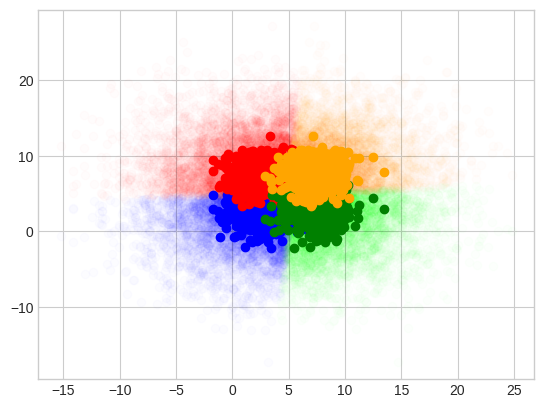

In [68]:
# Test dataset
data_size_test = 5000

rng_test = np.random.RandomState(2)
mu, sigma = 2.5, 5
x0_test = rng_test.normal(mu, sigma, data_size_test)
mu, sigma = 7.5, 5
x1_test = rng_test.normal(mu, sigma, data_size_test)
mu, sigma = 2.5, 5
y0_test = rng_test.normal(mu, sigma, data_size_test)
mu, sigma = 7.5, 5
y1_test = rng_test.normal(mu, sigma, data_size_test)


x_test = []
y_test = []
label_test = []
x_test.extend(x0_test)
x_test.extend(x0_test)
x_test.extend(x1_test)
x_test.extend(x1_test)
y_test.extend(y0_test)
y_test.extend(y1_test)
y_test.extend(y0_test)
y_test.extend(y1_test)

x_classified = [[], [], [], []]
y_classified = [[], [], [], []]

data_points_test = []
for xd_test, yd_test in zip(x_test, y_test):
  data_points_test.append([xd_test, yd_test])

for x_0_test, x_1_test in data_points_test:

  #Forward Pass
  h = np.matmul(np.array([[x_0_test, x_1_test]]), wi) + bi
  z = np.matmul(h, wo) + bo
  y = softmax(z)

  #Predction
  label_pre = np.argmax(y)
  x_classified[label_pre].append(x_0_test)
  y_classified[label_pre].append(x_1_test)

plt.scatter(x_classified[0], y_classified[0], color=(0, 0, 1, 0.01));
plt.scatter(x_classified[1], y_classified[1], color=(1, 0, 0, 0.01));
plt.scatter(x_classified[2], y_classified[2], color=(0, 1, 0, 0.01));
plt.scatter(x_classified[3], y_classified[3], color=(1, 0.64, 0, 0.01));

plt.scatter(x0, y0, color='blue');
plt.scatter(x0, y1, color='red');
plt.scatter(x1, y0, color='green');
plt.scatter(x1, y1, color='orange');

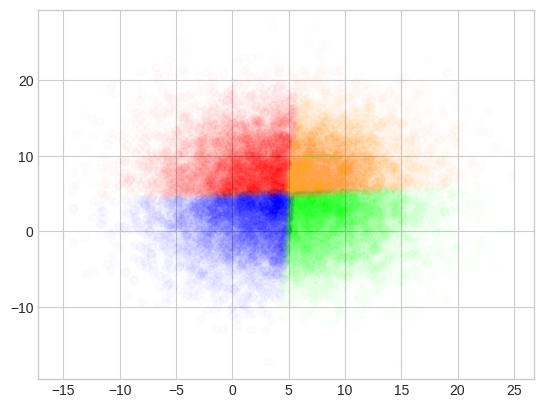

In [69]:
plt.scatter(x_classified[0], y_classified[0], color=(0, 0, 1, 0.01));
plt.scatter(x_classified[1], y_classified[1], color=(1, 0, 0, 0.01));
plt.scatter(x_classified[2], y_classified[2], color=(0, 1, 0, 0.01));
plt.scatter(x_classified[3], y_classified[3], color=(1, 0.64, 0, 0.01));